In [63]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [64]:
data= pd.read_csv('data.csv')

In [65]:
data.describe()

,patient_id,patient_age,patient_disease_id,average_time_p,doctor_id,doctor_age,prev_visited,daily_average,time
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,54.29100,50.751600,9.970070,1499.500000,49.988000,0.50000,9.877570,12.003200
std,1443.520003,20.81026,28.837327,2.867285,288.703862,11.834436,0.50005,2.840723,4.056511
min,1.000000,18.00000,1.000000,5.000000,1000.000000,30.000000,0.00000,5.010000,0.000000
25%,1250.750000,37.00000,26.000000,7.470000,1249.750000,40.000000,0.00000,7.457500,9.000000
50%,2500.500000,55.00000,51.000000,9.940000,1499.500000,49.500000,0.50000,9.800000,12.000000
75%,3750.250000,72.00000,76.000000,12.410000,1749.250000,60.000000,1.00000,12.332500,15.000000
max,5000.000000,90.00000,100.000000,15.000000,1999.000000,70.000000,1.00000,15.000000,23.000000


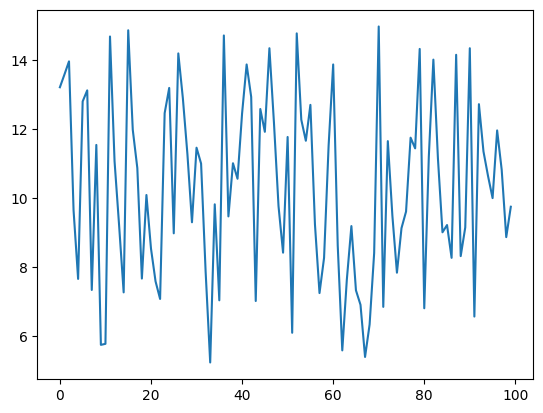

In [66]:
plt.plot(data['average_time_p'][:100])

In [67]:
# create a tf dataset

x=data.columns[:-1]
y=data.columns[-1]

In [68]:
x=data[x]
y=data[y]

In [69]:
train_x=x.values[:4000]
test_x=x.values[4000:]

train_y=y.values[:4000]
test_y=y.values[4000:]

train_dataset=tf.data.Dataset.from_tensor_slices((train_x,train_y))
test_dataset=tf.data.Dataset.from_tensor_slices((test_x,test_y))

train_dataset=train_dataset.batch(32)
test_dataset=test_dataset.batch(32)

In [70]:
# import the callbacks

from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

checkpoint=ModelCheckpoint('recommender-ensemble.h5',monitor='loss',save_best_only=True)

earlystop=EarlyStopping(monitor='loss',patience=10)

reduce_lr=ReduceLROnPlateau(monitor='loss',factor=0.2,patience=1,min_lr=1e-6)


In [71]:
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(16,input_shape=(8,),activation='relu'),
tf.keras.layers.Dense(8,activation='relu'),
tf.keras.layers.Dense(1,activation='linear')
])
model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam())

In [72]:
model.fit(train_dataset,validation_data=test_dataset,epochs=150,callbacks=[checkpoint,earlystop,reduce_lr])

Epoch 1/150


125/125 [==============================] - 1s 2ms/step - loss: 358.5708 - val_loss: 89.9644 - lr: 0.0010
Epoch 2/150
125/125 [==============================] - 0s 1ms/step - loss: 757.2994 - val_loss: 37.0493 - lr: 0.0010
Epoch 3/150
125/125 [==============================] - 0s 1ms/step - loss: 221.6082 - val_loss: 26.2908 - lr: 2.0000e-04
Epoch 4/150
125/125 [==============================] - 0s 1ms/step - loss: 104.3217 - val_loss: 23.0781 - lr: 2.0000e-04
Epoch 5/150
125/125 [==============================] - 0s 1ms/step - loss: 61.7944 - val_loss: 21.3838 - lr: 2.0000e-04
Epoch 6/150
125/125 [==============================] - 0s 1ms/step - loss: 39.9242 - val_loss: 21.1754 - lr: 2.0000e-04
Epoch 7/150
125/125 [==============================] - 0s 1ms/step - loss: 29.0843 - val_loss: 22.5103 - lr: 2.0000e-04
Epoch 8/150
125/125 [==============================] - 0s 1ms/step - loss: 23.8865 - val_loss: 24.6879 - lr: 2.0000e-04
Epoch 9/150
125/125 [==============================] - 0

In [73]:
# plot predicted values vs real values 

y_pred = model.predict(x)

157/157 [==============================] - 0s 743us/step


In [74]:
y_pred

array([[12.529988],
       [10.185449],
       [11.380742],
       ...,
       [ 8.573922],
       [ 8.918397],
       [ 9.663423]], dtype=float32)

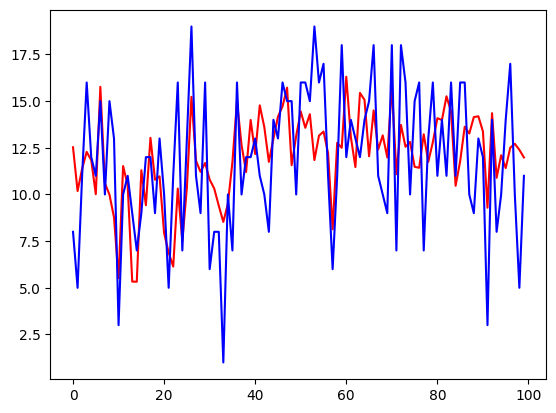

In [79]:
plt.plot(range(len(y_pred[:100])),y_pred[:100],color='red')
plt.plot(range(len(y_pred[:100])),y[:100],color='blue')

In [80]:
model.save('time.keras')